In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\sabar\\Downloads\\KNN+SVM+NaiveBayes+PCA\KNN + SVM + Naive Bayes + PCA\\Wine.csv")

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [8]:
x=df.drop(['Customer_Segment'],axis=1)

In [9]:
x

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [11]:
y=df[['Customer_Segment']]

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [15]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((124, 13), (54, 13), (124, 1), (54, 1))

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
from sklearn.svm import SVC
svcclf=SVC(kernel='linear')
svcclf.fit(x_train,y_train)

C:\Users\sabar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [18]:
pred_xtr=svcclf.predict(x_train)

In [19]:
pred_xt=svcclf.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
xtr_acc=accuracy_score(y_train,pred_xtr)

In [22]:
xtr_acc

0.9919354838709677

In [24]:
xt_acc=accuracy_score(y_test,pred_xt)

In [25]:
xt_acc

0.9814814814814815

In [26]:
df1=pd.read_csv("C:\\Users\\sabar\\Downloads\\KNN+SVM+NaiveBayes+PCA\KNN + SVM + Naive Bayes + PCA\\Wine.csv")

In [27]:
x

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [28]:
y

,Customer_Segment
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
from sklearn.decomposition import PCA

In [31]:
pc=PCA()

In [32]:
train_xpc=pc.fit_transform(x_train)

In [33]:
train_xpc=pd.DataFrame(data=train_xpc,columns=x.columns)

In [34]:
train_xpc

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,288.227263,-3.405653,1.786311,-1.622629,0.040431,0.359583,-0.611037,-0.335552,0.571149,-0.138512,-0.040462,-0.045091,0.019692
1,-434.830640,-1.695619,3.435792,-0.941751,-1.200867,0.126455,0.156481,0.261227,0.240232,0.179553,0.144023,-0.190441,0.079592
2,88.522450,18.645048,-2.219890,5.098258,0.858531,0.028939,0.536342,-0.314122,0.191752,-0.113739,0.215641,0.055242,0.033744
3,83.235668,0.709720,-1.937147,-0.811727,2.388991,-0.749524,-0.151122,0.587733,0.146664,0.107229,0.179289,-0.248628,0.016231
4,-336.959755,-9.030114,-3.078032,-2.268146,-2.159004,0.996840,-1.326671,0.621813,-0.133904,0.168922,-0.015636,0.193588,-0.216019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,-331.940066,-9.208870,2.319329,-1.753042,-0.046894,-0.423889,0.294627,0.034127,-0.317489,0.466762,0.310567,-0.093179,-0.002922
120,-237.063620,-18.600133,1.082886,0.014683,-1.412168,-0.455710,-0.086416,-0.747382,0.456602,-0.154028,0.337084,0.090240,-0.044117
121,-401.619126,13.869087,0.283613,-2.468278,-0.760737,0.011034,-0.386620,0.075689,0.097591,-0.211331,0.164939,-0.043571,0.052483
122,238.244344,-2.662564,2.144924,0.730511,-1.211042,0.768377,-0.247127,0.036478,-0.010876,-0.009076,0.247919,-0.180055,0.011027


In [36]:
nb=GaussianNB().fit(train_xpc,y_train)

C:\Users\sabar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [37]:
test_pc=pc.transform(x_test)

In [38]:
test_pc=pd.DataFrame(data=test_pc,columns=x.columns)

In [39]:
ps=nb.predict_proba(test_pc)
ps

array([[9.99410847e-01, 5.71529246e-04, 1.76236961e-05],
       [5.47208321e-09, 2.56788187e-06, 9.99997427e-01],
       [1.57180405e-04, 9.72980064e-01, 2.68627554e-02],
       [9.98751583e-01, 1.18907649e-03, 5.93406351e-05],
       [4.67556849e-04, 9.99312849e-01, 2.19593926e-04],
       [7.32813603e-13, 9.99837113e-01, 1.62886545e-04],
       [9.99996550e-01, 3.44887437e-06, 8.89149698e-10],
       [4.51901563e-05, 1.04309657e-03, 9.98911713e-01],
       [1.73763399e-02, 9.21531596e-01, 6.10920644e-02],
       [1.12432115e-02, 9.83119288e-01, 5.63750017e-03],
       [1.91535701e-01, 4.63327362e-02, 7.62131563e-01],
       [6.69536739e-05, 9.90777642e-03, 9.90025270e-01],
       [9.99999982e-01, 1.76429616e-08, 3.84451160e-13],
       [1.72343935e-01, 8.20689582e-01, 6.96648338e-03],
       [4.87552519e-03, 1.86521925e-03, 9.93259256e-01],
       [3.27757186e-04, 9.99581555e-01, 9.06882662e-05],
       [9.78258635e-01, 2.17383068e-02, 3.05777202e-06],
       [1.00000000e+00, 8.95901

In [40]:
t=[]
for i in ps:
    m=i.max()
    t.append(list(i).index(m))

In [41]:
t

[0,
 2,
 1,
 0,
 1,
 1,
 0,
 2,
 1,
 1,
 2,
 2,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 1,
 2,
 0,
 2,
 2,
 0,
 2]

In [65]:
pred_train=nb.predict(train_xpc)
pred_train

array([1, 2, 3, 3, 2, 3, 3, 1, 3, 3, 2, 2, 3, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       3, 3, 2, 2, 2, 3, 3, 1, 3, 2, 2, 2, 2, 2, 1, 1, 2, 1, 3, 1, 3, 1,
       1, 2, 1, 2, 2, 1, 3, 2, 1, 2, 2, 2, 2, 1, 3, 3, 1, 1, 2, 3, 1, 1,
       2, 2, 1, 1, 1, 3, 2, 1, 2, 3, 1, 2, 3, 3, 1, 1, 3, 1, 3, 2, 1, 1,
       2, 1, 3, 2, 3, 1, 3, 3, 3, 1, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3,
       2, 1, 3, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 3], dtype=int64)

In [66]:
pred_test=nb.predict(test_pc)
pred_test

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 2,
       2, 1, 3, 2, 3, 1, 3, 3, 1, 3], dtype=int64)

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [56]:
acc=accuracy_score(y_train,pred_train)

In [57]:
acc

0.967741935483871

In [63]:
acc_t=accuracy_score(y_test,pred_test)

In [64]:
acc

0.967741935483871

In [69]:
cm=(confusion_matrix(y_train,pred_train))

In [70]:
cm

array([[38,  2,  0],
       [ 0, 48,  1],
       [ 0,  1, 34]], dtype=int64)

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
sc=StandardScaler()


In [91]:
sc_train=sc.fit_transform(x_train)

In [92]:
sc_train

array([[ 0.91083058, -0.46259897, -0.01142613, ...,  0.65706596,
         1.94354495,  0.93700997],
       [-0.95609928, -0.96608672, -1.53725357, ..., -0.40859506,
         0.58118003, -1.41336684],
       [ 0.35952243,  1.67501572, -0.37471838, ..., -1.55950896,
        -1.44846566,  0.28683658],
       ...,
       [-0.70550467, -0.68342693, -0.62902295, ...,  0.44393375,
         0.49776993, -1.30608823],
       [ 1.14889546, -0.6215951 , -0.88332752, ..., -0.19546286,
         1.0121322 ,  0.77446662],
       [ 1.47466845,  0.11155374,  0.42452457, ..., -1.43162964,
        -1.23994042, -0.28206514]])

In [93]:
sc_train=pd.DataFrame(sc_train,columns=x.columns)

In [94]:
sc_train

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.910831,-0.462599,-0.011426,-0.820679,0.062417,0.588204,0.935654,-0.761914,0.130072,-0.512387,0.657066,1.943545,0.937010
1,-0.956099,-0.966087,-1.537254,-0.147487,-0.554019,0.169986,0.072432,0.207913,0.784626,-0.982107,-0.408595,0.581180,-1.413367
2,0.359522,1.675016,-0.374718,0.133010,1.363782,-1.118128,-1.314889,0.531189,-0.440566,2.220529,-1.559509,-1.448466,0.286837
3,0.221695,1.047864,-0.774340,0.413506,0.130910,-1.268687,-1.458759,0.531189,-0.524483,-0.426984,-1.516883,-1.281645,0.270582
4,1.098777,-0.771758,1.114780,1.535493,-0.964977,1.156982,0.915101,-1.246827,0.432174,-0.691735,1.722727,0.775804,-1.094782
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,-1.457289,-0.586263,-1.755229,-0.007239,-0.964977,0.404188,-0.338626,0.046275,-0.323081,-1.255399,-0.067584,-0.225118,-1.078528
120,-0.768153,-1.072084,-1.609912,0.020811,-1.512920,-0.248233,0.031327,-0.761914,-0.960853,-0.136611,0.699692,1.220657,-0.769695
121,-0.705505,-0.683427,-0.629023,0.834251,0.541867,-0.432249,0.123815,-0.196181,-0.004196,-1.255399,0.443934,0.497770,-1.306088
122,1.148895,-0.621595,-0.883328,-0.988977,0.062417,1.407913,1.459753,-1.246827,0.885327,0.469754,-0.195463,1.012132,0.774467


In [95]:
sc_test=sc.fit_transform(x_test)

In [96]:
sc_test=pd.DataFrame(sc_test,columns=x.columns)

In [97]:
sc_test

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.838394,-0.524383,-0.461080,-1.114466,1.427322,0.327651,0.709496,-1.172520,0.155842,0.294490,-0.194122,0.831387,0.952918
1,-0.300934,0.416058,0.392365,0.949309,0.977903,-1.336188,-0.780069,-0.932079,-0.556997,2.508759,-2.271753,-1.710111,-0.813918
2,-0.804636,-1.032221,-0.795037,-0.156285,-0.894677,1.664665,0.902946,-1.332814,0.650869,-0.331768,1.222445,0.346593,-0.996694
3,0.622522,-0.467956,0.318152,0.396512,1.277515,0.862456,0.593426,-1.252667,1.799331,0.473421,0.089191,0.581644,1.135694
4,0.010882,3.359637,-0.906355,0.765044,-0.969580,0.357362,0.467683,-0.451198,0.928084,-1.159322,-1.091281,0.684480,-1.118545
5,-1.776063,-0.167015,3.175336,3.344763,1.502225,1.189282,2.818102,0.911300,0.650869,0.361589,-0.146903,1.551233,-0.859612
6,1.222168,-0.072971,0.874746,-0.672228,1.652031,0.327651,0.332268,-0.371051,-0.576798,-0.063371,0.466942,1.389635,1.668791
7,-0.816629,1.506969,0.021302,0.580778,-0.819774,-0.118020,-1.205660,1.151741,-0.992621,1.099679,-1.894002,-1.548513,-0.692067
8,-0.948552,-0.467956,-0.943462,-0.156285,-1.418999,-1.083641,-0.132012,0.109831,0.175643,-0.801461,0.183629,0.787315,-0.722530
9,-1.152431,-0.373912,-0.201336,-0.340550,-1.344096,-1.157920,-0.644654,1.312035,0.195444,-1.248788,0.561380,-0.534852,-0.813918


In [98]:
pc_xtr=pc.fit_transform(sc_train)

In [99]:
pc_xtr

array([[ 2.59891628, -0.00484089,  0.10440192, ..., -0.19943355,
         0.24199709,  0.39622547],
       [ 0.15819134,  2.26659577,  0.61913512, ..., -0.15954628,
         0.96891286,  0.29600538],
       [-2.6372337 , -2.66488569,  0.98904663, ...,  0.19675457,
        -0.15375183,  0.33640162],
       ...,
       [-0.06526682,  2.04360861, -0.44934721, ...,  0.44502895,
         0.73390777,  0.23202467],
       [ 2.91835495, -0.82035658,  0.95375821, ...,  0.1399789 ,
         0.55389708,  0.31117471],
       [-2.40719925, -2.23612256,  0.84103942, ...,  0.39113069,
         0.47288025, -0.29411686]])

In [101]:
pc_xtr=pd.DataFrame(pc_xtr)

In [102]:
pc_xtr

,0,1,2,3,4,5,6,7,8,9
0,2.598916,-0.004841,0.104402,-0.508638,-0.371912,-0.726659,-0.500274,-0.199434,0.241997,0.396225
1,0.158191,2.266596,0.619135,-0.094246,1.066142,0.500971,0.784497,-0.159546,0.968913,0.296005
2,-2.637234,-2.664886,0.989047,1.153343,0.799421,0.266671,-0.277414,0.196755,-0.153752,0.336402
3,-2.528484,-0.518466,0.912517,0.477930,0.495806,-0.163598,-0.600616,-0.099409,-0.385553,0.916558
4,1.709226,0.917195,-2.016481,-0.763331,-0.760645,-1.047392,0.718804,1.795250,0.629038,-0.837779
...,...,...,...,...,...,...,...,...,...,...
119,-0.527714,2.594728,0.938007,-0.286730,0.554026,0.049556,0.377852,-0.164596,0.279337,0.408412
120,0.311281,2.286773,1.164587,-0.941708,-0.438944,-0.871403,0.804864,0.589025,0.200462,0.419837
121,-0.065267,2.043609,-0.449347,0.976880,-0.005334,-0.185616,0.049589,0.445029,0.733908,0.232025
122,2.918355,-0.820357,0.953758,-0.396855,0.675845,-0.426604,0.658534,0.139979,0.553897,0.311175


In [103]:
pc.explained_variance_ratio_.cumsum()

array([0.37329648, 0.56148574, 0.67045365, 0.74769754, 0.81248349,
       0.85840362, 0.89827298, 0.92349212, 0.94607393, 0.96438317])

In [87]:
pc=PCA(n_components=10)

In [104]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
accktr=[]
acckt=[]
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i).fit(train_xpc,y_train)
    pred_ktr=knn.predict(train_xpc)
    pred_kt=knn.predict(test_pc)
    accktr.append(accuracy_score(y_train,pred_ktr))
    acckt.append(accuracy_score(y_test,pred_kt))

C:\Users\sabar\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\sabar\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\sabar\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\sabar\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [110]:
import matplotlib.pyplot as plt

In [111]:
lt=list(range(1,10))

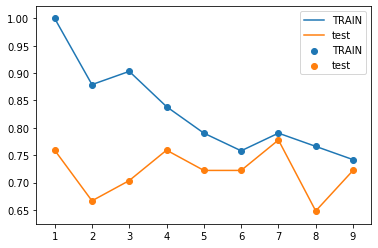

In [114]:
plt.plot(lt,accktr,label='TRAIN')
plt.scatter(lt,accktr,label='TRAIN')
plt.plot(lt,acckt,label='test')
plt.scatter(lt,acckt,label='test')
plt.legend()

# knn=7

In [ ]:
import seaborn as sns

# 1ques

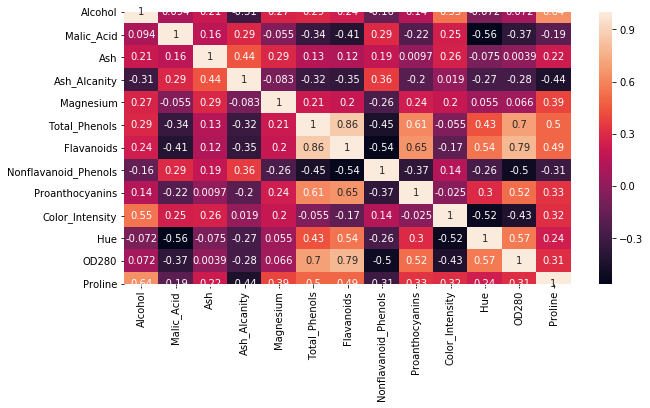

In [118]:
plt.figure( figsize=(10,5))
sns.heatmap(x.corr(),annot=True)

# 5# best model is svm because it has highest accuracy
